In [72]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IMG_ROOT_FOLDER = r"..\..\img\_maskedLanguageModelPlots"

def read_folder(folder):
    results_per_epoch = [x for x in os.listdir(folder) if "results_per_epoch.json" in x][0]
    results_per_epoch = os.path.join(folder, results_per_epoch)
    with open(results_per_epoch, 'r') as f:
        results_per_epoch = json.load(f)

    results_full = [x for x in os.listdir(folder) if "results_full.json" in x][0]
    results_full = os.path.join(folder, results_full)
    with open(results_full, 'r') as f:
        results_full = json.load(f)

    return results_per_epoch, results_full

def plot_per_epoch_results(index, mean, yerr, full_data, no_pretrain_data, plot_lr=True, ax=None, fig=None, savepath=None, ylabel="TPR", title=None, lrcolor="red", maincolor="tab:blue"):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    # plot per epoch results
    ax.errorbar(index, mean, yerr=yerr,  elinewidth=3, capsize=3, color=maincolor)
    # plot full results
    ax.plot(index, [full_data]*len(index), color='tab:green', linestyle='dashed')
    # plot results without pre-training
    ax.plot(index, [no_pretrain_data]*len(index), color='tab:olive', linestyle='dashed')

    if plot_lr:
        # fit linear regression line for auc_mean
        from sklearn.linear_model import LinearRegression
        X = np.array(index).reshape(-1, 1)
        y = mean
        model = LinearRegression().fit(X, y)
        # plot dashed red line of linear regression
        ax.plot(index, model.predict(X), color=lrcolor, linestyle='dashed')
        # ax setup
        ax.legend(["fully supervised", "no pre-training", "auc approximation", "pre-training epoch"])
    else:
        ax.legend(["fully supervised", "no pre-training", "pre-training epoch"])

    ax.grid()
    ax.set_title(title)
    ax.set_xlabel("epoch")
    ax.set_ylabel(ylabel)
    if savepath:
        if fig:
            fig.tight_layout()
            fig.savefig(savepath)
        else:
            plt.savefig(savepath)
    if fig:
        return fig, ax
    else:
        return ax

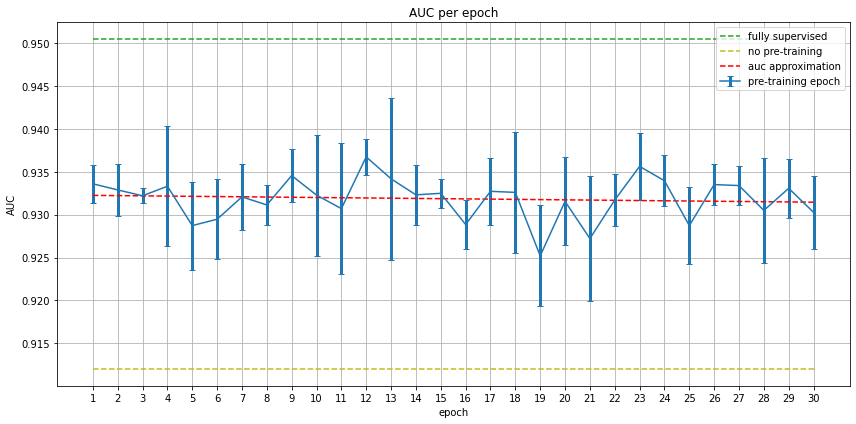

In [73]:
folder = os.path.join("pretrain_epoch_analysis", "uSize_0.8_1674855395")
results_per_epoch, results_full = read_folder(folder)

df = pd.DataFrame(results_per_epoch).transpose()
full_data = np.nanmean(results_full['full_data']['auc'])
no_pretrain_data = np.nanmean(results_full['non_pretrained']['auc'])
fig, ax = plot_per_epoch_results(df.index, df["auc_mean"], df["auc_std"], full_data, no_pretrain_data, savepath=os.path.join(IMG_ROOT_FOLDER, "per_epoch_auc.png"), title="AUC per epoch", ylabel="AUC")


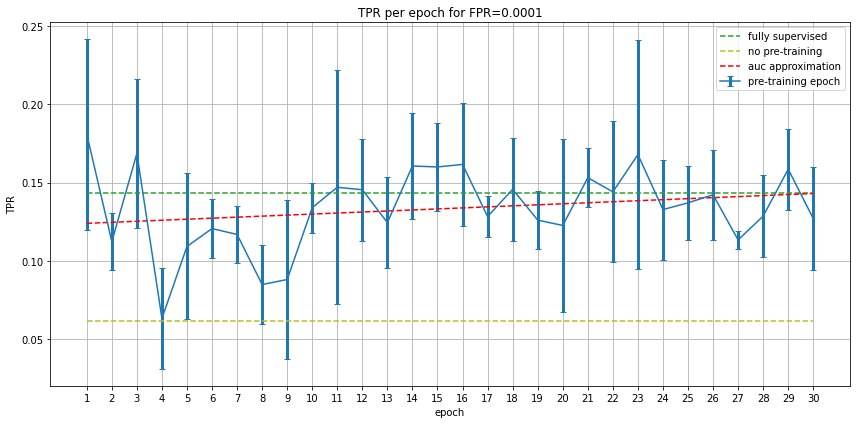

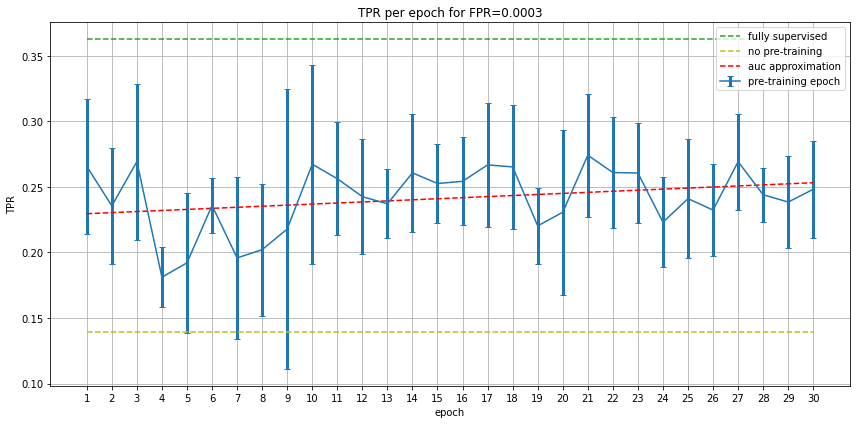

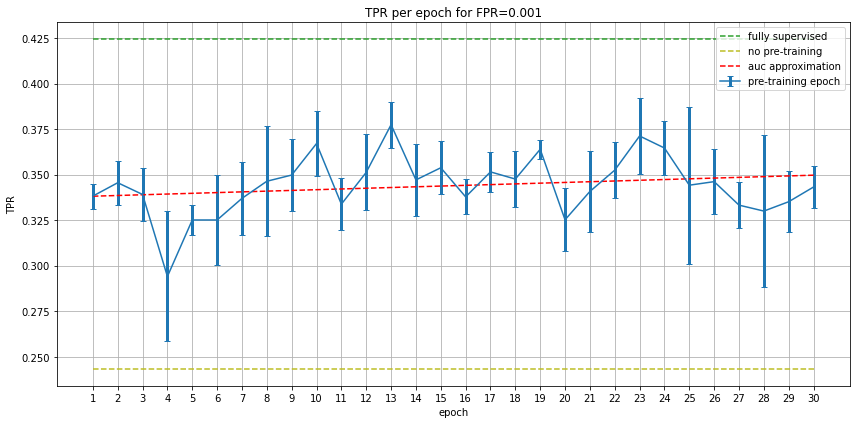

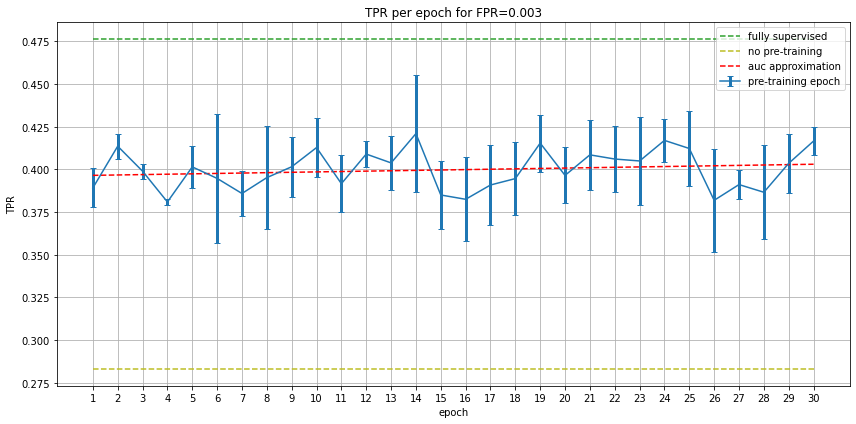

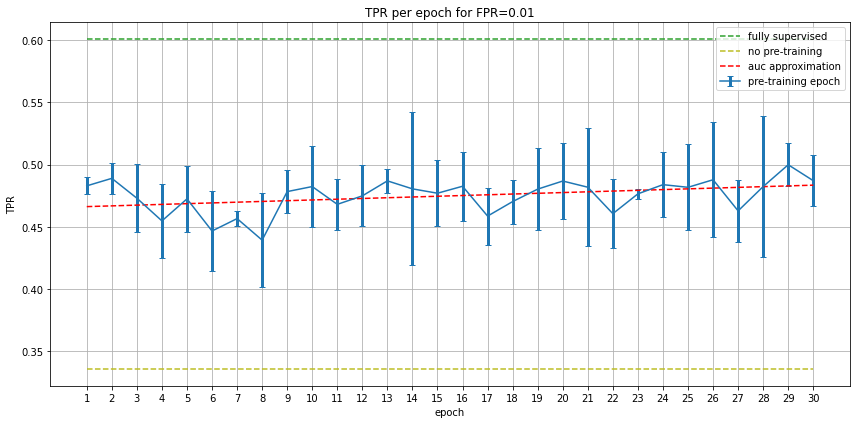

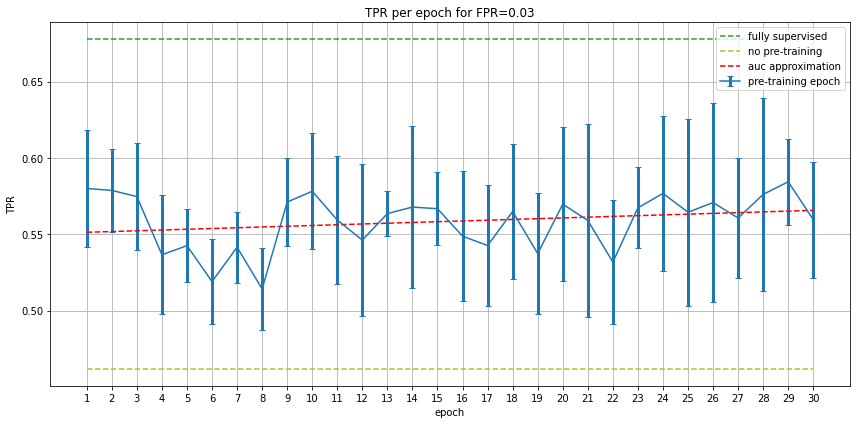

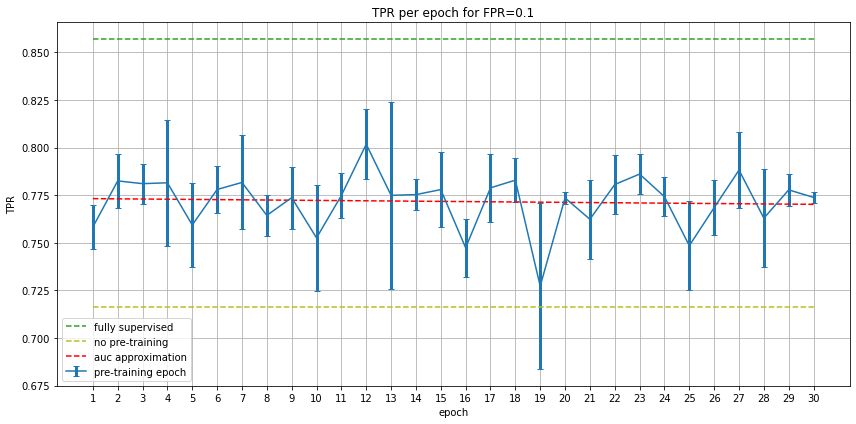

In [74]:
tpr_mean_df = pd.DataFrame(index=results_per_epoch.keys(), data=[results_per_epoch[x]['tpr_mean'] for x in results_per_epoch])
tpr_std_df = pd.DataFrame(index=results_per_epoch.keys(), data=[results_per_epoch[x]['tpr_std'] for x in results_per_epoch])

fprs = results_per_epoch['1']['tpr_mean'].keys()
for fpr in fprs:
    full_data = results_full['full_data'][f'fpr_{fpr}']['tpr_mean']
    no_pretrain_data = results_full['non_pretrained'][f'fpr_{fpr}']['tpr_mean']
    _ = plot_per_epoch_results(tpr_mean_df.index, tpr_mean_df[fpr], tpr_std_df[fpr], full_data, no_pretrain_data, plot_lr=True, savepath=os.path.join(IMG_ROOT_FOLDER, f"per_epoch_{fpr}.png"), title=f"TPR per epoch for FPR={fpr}", ylabel="TPR")

## What if we re-mask token after every epoch?

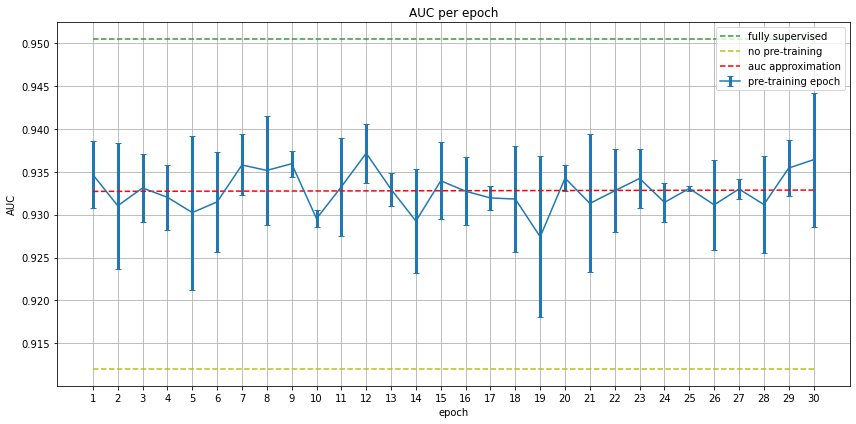

In [75]:
folder = os.path.join("pretrain_epoch_analysis", "uSize_0.8_mask_every_epoch_1674909969")
results_per_epoch, results_full = read_folder(folder)

df = pd.DataFrame(results_per_epoch).transpose()
full_data = np.nanmean(results_full['full_data']['auc'])
no_pretrain_data = np.nanmean(results_full['non_pretrained']['auc'])
_ = plot_per_epoch_results(df.index, df["auc_mean"], df["auc_std"], full_data, no_pretrain_data, savepath=os.path.join(IMG_ROOT_FOLDER, "per_epoch_auc_mask_every_epoch.png"), title="AUC per epoch", ylabel="AUC")

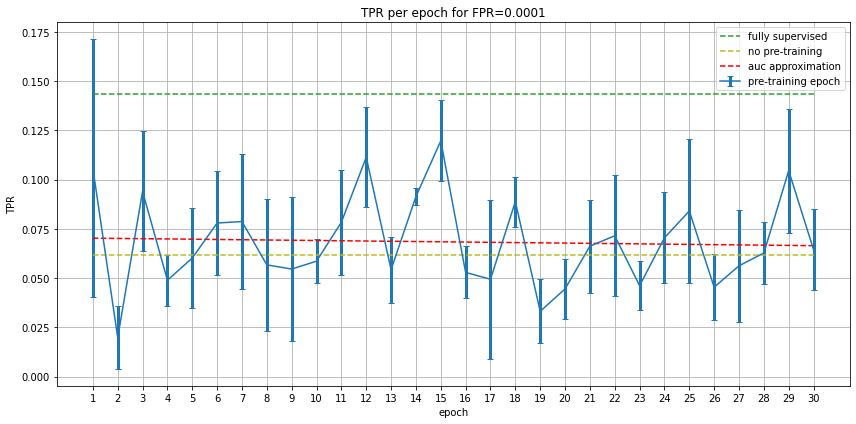

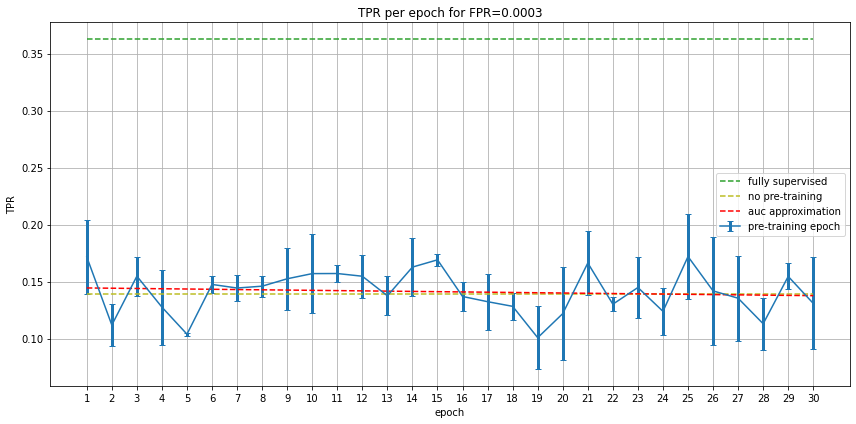

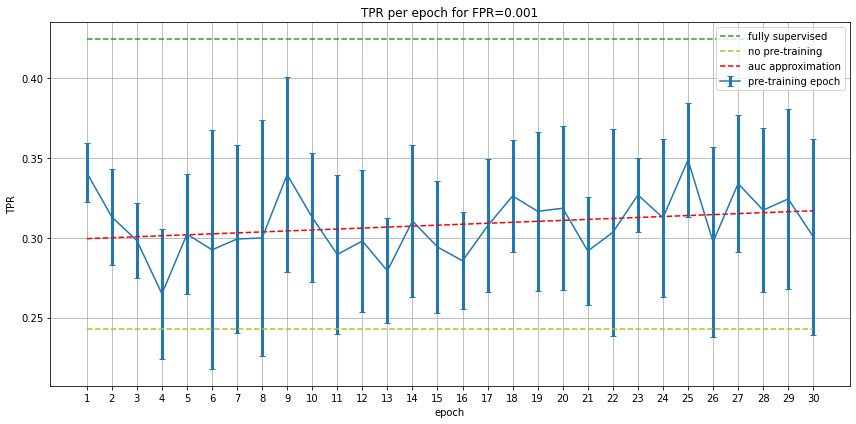

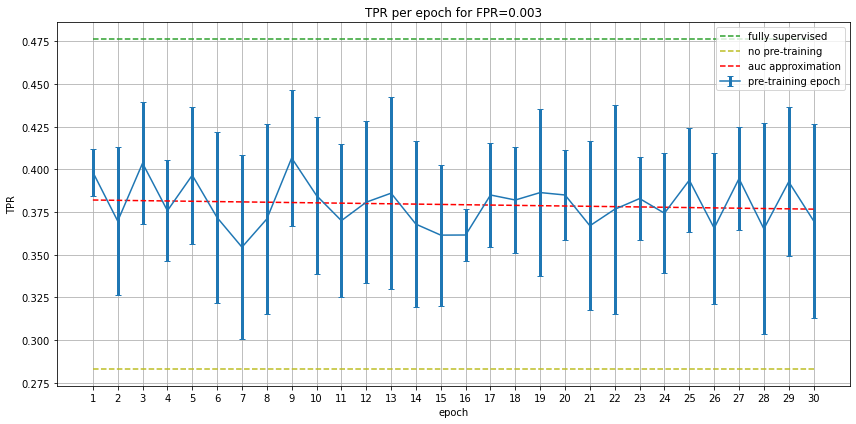

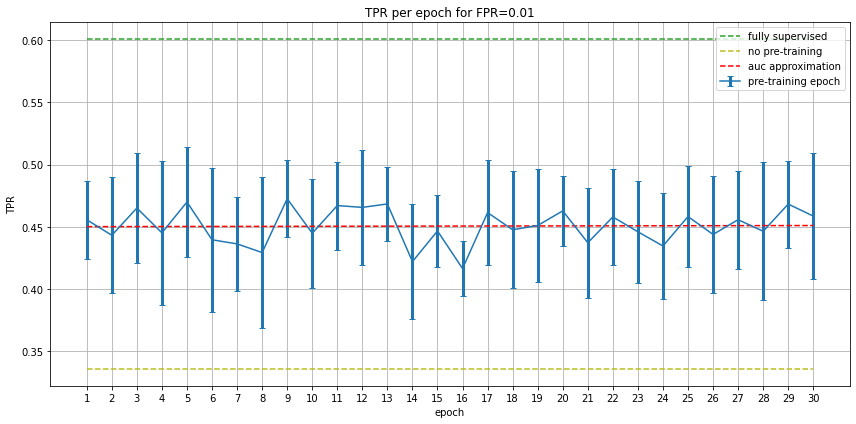

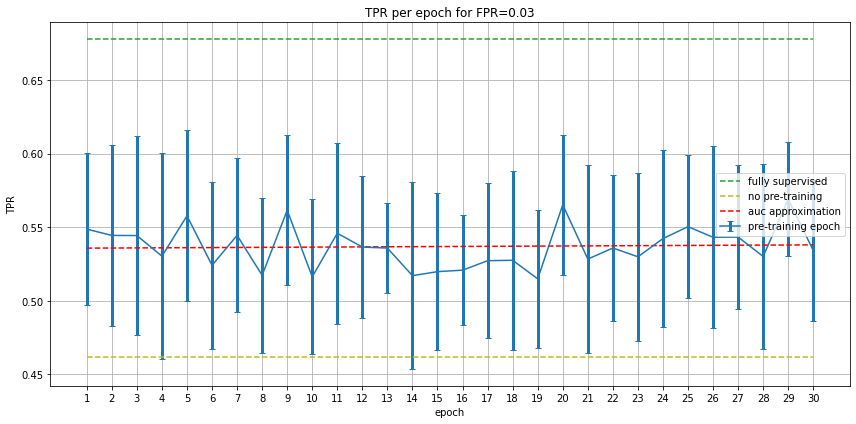

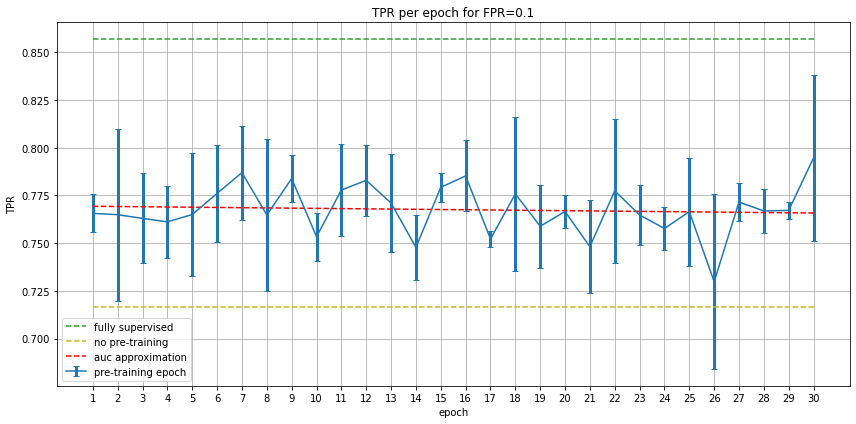

In [76]:
tpr_mean_df = pd.DataFrame(index=results_per_epoch.keys(), data=[results_per_epoch[x]['tpr_mean'] for x in results_per_epoch])
tpr_std_df = pd.DataFrame(index=results_per_epoch.keys(), data=[results_per_epoch[x]['tpr_std'] for x in results_per_epoch])

fprs = results_per_epoch['1']['tpr_mean'].keys()
for fpr in fprs:
    full_data = results_full['full_data'][f'fpr_{fpr}']['tpr_mean']
    no_pretrain_data = results_full['non_pretrained'][f'fpr_{fpr}']['tpr_mean']
    _ = plot_per_epoch_results(tpr_mean_df.index, tpr_mean_df[fpr], tpr_std_df[fpr], full_data, no_pretrain_data, plot_lr=True, savepath=os.path.join(IMG_ROOT_FOLDER, f"per_epoch_{fpr}_mask_every_epoch.png"), title=f"TPR per epoch for FPR={fpr}", ylabel="TPR")

### Compare directly

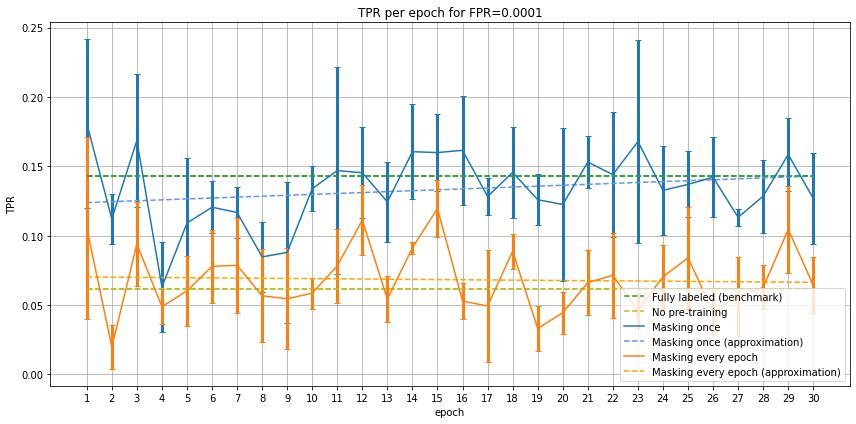

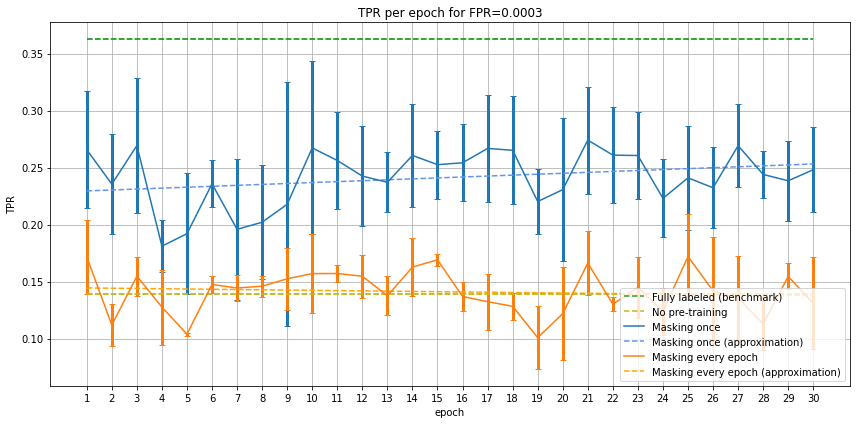

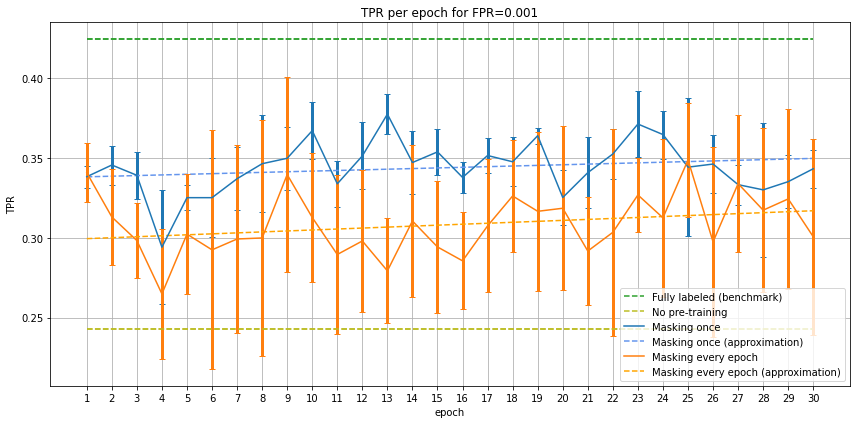

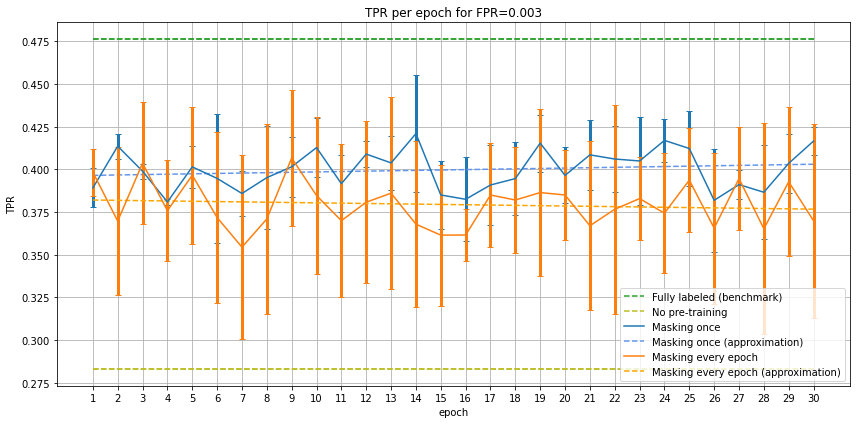

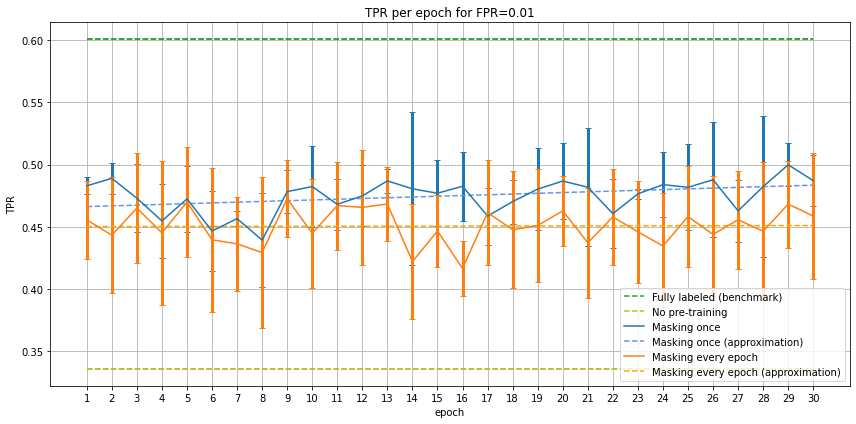

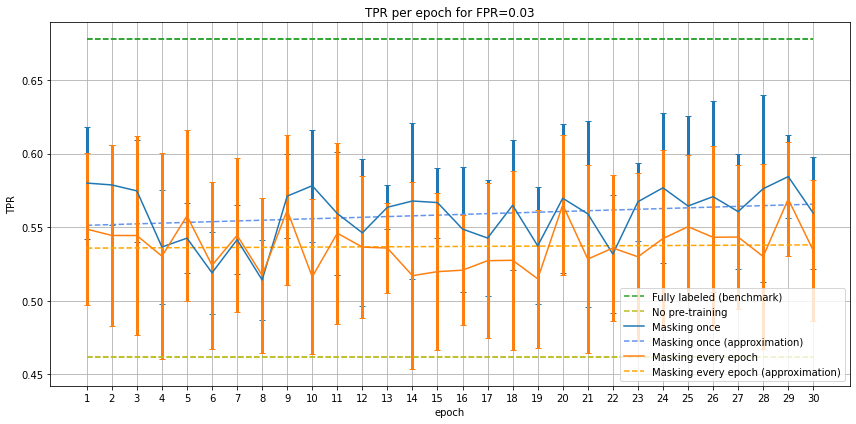

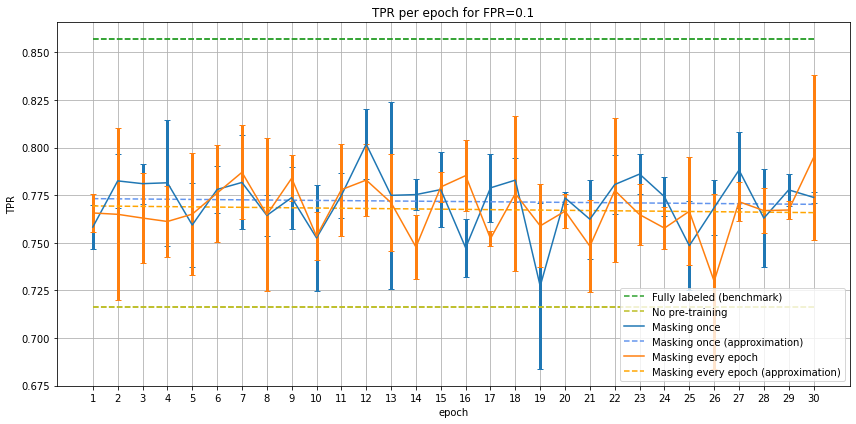

In [80]:
folder = os.path.join("pretrain_epoch_analysis", "uSize_0.8_1674855395")
results_per_epoch, results_full = read_folder(folder)
df = pd.DataFrame(results_per_epoch).transpose()
tpr_mean_df = pd.DataFrame(index=results_per_epoch.keys(), data=[results_per_epoch[x]['tpr_mean'] for x in results_per_epoch])
tpr_std_df = pd.DataFrame(index=results_per_epoch.keys(), data=[results_per_epoch[x]['tpr_std'] for x in results_per_epoch])

mask_every_epoch_folder = os.path.join("pretrain_epoch_analysis", "uSize_0.8_mask_every_epoch_1674909969")
results_per_epoch_mask_every_epoch, results_full_mask_every_epoch = read_folder(mask_every_epoch_folder)
df_mask_every_epoch = pd.DataFrame(results_per_epoch_mask_every_epoch).transpose()
tpr_mean_df_mask_every_epoch = pd.DataFrame(index=results_per_epoch_mask_every_epoch.keys(), data=[results_per_epoch_mask_every_epoch[x]['tpr_mean'] for x in results_per_epoch_mask_every_epoch])
tpr_std_df_mask_every_epoch = pd.DataFrame(index=results_per_epoch_mask_every_epoch.keys(), data=[results_per_epoch_mask_every_epoch[x]['tpr_std'] for x in results_per_epoch_mask_every_epoch])

fprs = results_per_epoch['1']['tpr_mean'].keys()
for fpr in fprs:
    full_data = results_full['full_data'][f'fpr_{fpr}']['tpr_mean']
    no_pretrain_data = results_full['non_pretrained'][f'fpr_{fpr}']['tpr_mean']
    full_data_mask_every_epoch = results_full_mask_every_epoch['full_data'][f'fpr_{fpr}']['tpr_mean']
    no_pretrain_data_mask_every_epoch = results_full_mask_every_epoch['non_pretrained'][f'fpr_{fpr}']['tpr_mean']
    fig, ax = plot_per_epoch_results(tpr_mean_df.index, tpr_mean_df[fpr], tpr_std_df[fpr], full_data, no_pretrain_data, plot_lr=True, title=f"TPR per epoch for FPR={fpr}", ylabel="TPR", lrcolor="cornflowerblue")
    fig, ax = plot_per_epoch_results(tpr_mean_df_mask_every_epoch.index, tpr_mean_df_mask_every_epoch[fpr], tpr_std_df_mask_every_epoch[fpr], full_data_mask_every_epoch, no_pretrain_data_mask_every_epoch, plot_lr=True,title=f"TPR per epoch for FPR={fpr}", ylabel="TPR", ax=ax, fig=fig, maincolor="tab:orange", lrcolor="orange")
    ax.grid()
    # get lines out of ax
    lines = ax.get_lines()
    lines = [lines[3], lines[4], lines[0], lines[5], lines[6], lines[11]]
    labels = ["Fully labeled (benchmark)", "No pre-training", "Masking once", "Masking once (approximation)", "Masking every epoch", "Masking every epoch (approximation)"]
    _ = ax.legend(lines, labels, loc="lower right")
    fig.tight_layout()
    fig.savefig(os.path.join(IMG_ROOT_FOLDER, f"compare_mask_once_mask_every_epoch_{fpr}.png"))